<h1>Credit Scoring Model</h1>

<h3>Develop a credit scoring model to predict the creditworthiness of individuals based on historical financial data. Utilize classification algorithms and assess the model's accuracy.<h3>

# Importing necessary libraries

In [1]:
#Importing The Required Libraries
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import plotly.express as px
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import itertools
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,f1_score,confusion_matrix, accuracy_score

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Read the data

In [3]:
# Read data
df = pd.read_csv(r'C:\Users\jayac\OneDrive\Desktop\McGill\Deep Learning\Datasets\bank.csv')
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df.shape

(4521, 17)

# Preprocessing the data

In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [9]:
df['marital'].value_counts()

marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64

<Axes: xlabel='marital', ylabel='count'>

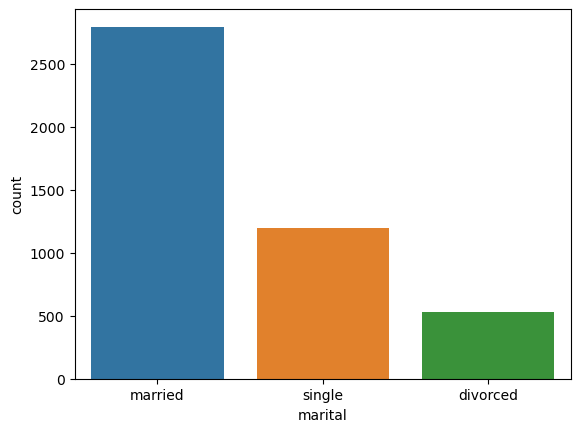

In [10]:
sns.countplot(x='marital',data=df)

<Axes: xlabel='housing', ylabel='count'>

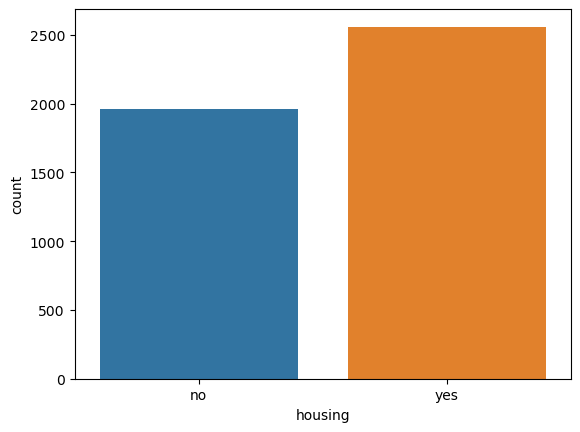

In [11]:
sns.countplot(x='housing',data=df)

In [12]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [13]:
categories_1st=["job","marital","education","default","housing","housing","loan","contact","month","poutcome","y"]
LE=LabelEncoder()
for i in categories_1st:
    df[i]=LE.fit_transform(df[i])

In [14]:
df.rename(columns={"y": "loan_approval"}, inplace=True)

In [15]:
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,loan_approval
age,1.000000,-0.021500,-0.381485,-0.121613,-0.017885,0.083820,-0.193888,-0.011250,0.015161,-0.017853,-0.040714,-0.002367,-0.005148,-0.008894,-0.003511,-0.009320,0.045092
job,-0.021500,1.000000,0.069390,0.170160,0.008324,0.009797,-0.128353,-0.040245,-0.074068,0.012865,-0.096613,-0.006739,-0.002739,-0.022760,0.005029,0.013049,0.027401
marital,-0.381485,0.069390,1.000000,0.102714,-0.020745,0.024971,-0.029851,-0.045210,-0.068236,0.008794,-0.035855,0.006619,0.005915,0.017050,0.038028,-0.027716,0.015042
education,-0.121613,0.170160,0.102714,1.000000,-0.010534,0.057725,-0.087070,-0.054086,-0.110554,0.014926,-0.050086,-0.014878,-0.001723,0.012077,0.023983,-0.032135,0.042987
default,-0.017885,0.008324,-0.020745,-0.010534,1.000000,-0.070886,0.006881,0.063994,0.008448,-0.013261,0.014297,-0.011615,-0.012348,-0.026317,-0.026656,0.039032,0.001303
balance,0.083820,0.009797,0.024971,0.057725,-0.070886,1.000000,-0.050227,-0.071349,-0.009665,-0.008677,0.023113,-0.015950,-0.009976,0.009437,0.026196,-0.029268,0.017905
housing,-0.193888,-0.128353,-0.029851,-0.087070,0.006881,-0.050227,1.000000,0.018451,0.196454,-0.031291,0.266630,0.015740,-0.003574,0.116893,0.038621,-0.093093,-0.104683
loan,-0.011250,-0.040245,-0.045210,-0.054086,0.063994,-0.071349,0.018451,1.000000,-0.007319,-0.004879,0.016329,-0.004997,0.017120,-0.031086,-0.022115,0.027028,-0.070517
contact,0.015161,-0.074068,-0.068236,-0.110554,0.008448,-0.009665,0.196454,-0.007319,1.000000,-0.033807,0.370077,-0.011380,0.012278,-0.243223,-0.187232,0.267173,-0.133595
day,-0.017853,0.012865,0.008794,0.014926,-0.013261,-0.008677,-0.031291,-0.004879,-0.033807,1.000000,-0.014795,-0.024629,0.160706,-0.094352,-0.059114,0.073714,-0.011244


In [16]:
x=df.iloc[:,:-1]
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1


In [17]:
y=df.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: loan_approval, Length: 4521, dtype: int32

In [18]:
print(x.shape, y.shape)

(4521, 16) (4521,)


In [19]:
print("Before oversampling:")
print(y.value_counts())
sm=RandomOverSampler()
x,y=sm.fit_resample(x,y)
print("After oversampling:")
print(y.value_counts())

Before oversampling:
loan_approval
0    4000
1     521
Name: count, dtype: int64
After oversampling:
loan_approval
0    4000
1    4000
Name: count, dtype: int64


In [20]:
#minmaxscaler
ms=MinMaxScaler()
x=ms.fit_transform(x)
x

array([[0.16176471, 0.90909091, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.20588235, 0.63636364, 0.5       , ..., 0.38990826, 0.16      ,
        0.        ],
       [0.23529412, 0.36363636, 1.        , ..., 0.37958716, 0.04      ,
        0.        ],
       ...,
       [0.22058824, 0.63636364, 0.5       , ..., 0.14678899, 0.12      ,
        0.66666667],
       [0.39705882, 0.81818182, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.51470588, 1.        , 0.5       , ..., 0.1146789 , 0.08      ,
        0.33333333]])

In [21]:
#splitting to test and train data
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (7200, 16) (7200,)
Test set: (800, 16) (800,)


# Using Logistic Regression

In [22]:
LR = LogisticRegression(C=0.011, solver='liblinear').fit(X_train,y_train)
y_pred = LR.predict(X_test)

In [23]:
y_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [24]:
LR_score=accuracy_score(y_test, y_pred)
LR_F1_SCORE=f1_score(y_test, y_pred, average='weighted') 
print('F1_score:%.4f'%LR_F1_SCORE)
print('Accuracy: %f' % accuracy_score(y_test, y_pred))

F1_score:0.7009
Accuracy: 0.702500


In [25]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.63      0.72      0.67       340
           1       0.77      0.69      0.73       460

    accuracy                           0.70       800
   macro avg       0.70      0.71      0.70       800
weighted avg       0.71      0.70      0.70       800



Confusion matrix, without normalization
[[246 144]
 [ 94 316]]


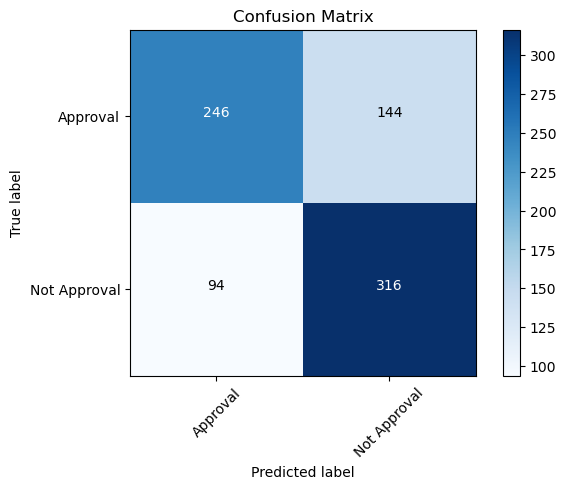

In [26]:
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['Approval', 'Not Approval']
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False, title='Confusion Matrix')
plt.show()

# Using SVM

In [27]:
clf = svm.SVC(C=10, gamma =1,kernel='rbf')
clf.fit(X_train, y_train) 

SVC(C=10, gamma=1)

In [28]:
y_pred = clf.predict(X_test)
y_pred 

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,

In [29]:
SVM_score=accuracy_score(y_test, y_pred)
SVM_F1_SCORE=f1_score(y_test, y_pred, average='weighted') 
print('F1_score:%.4f'%SVM_F1_SCORE)
print('Accuracy: %f' % accuracy_score(y_test, y_pred))

F1_score:0.8910
Accuracy: 0.891250


In [30]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       359
           1       0.93      0.87      0.90       441

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800



Confusion matrix, without normalization
[[331  59]
 [ 28 382]]


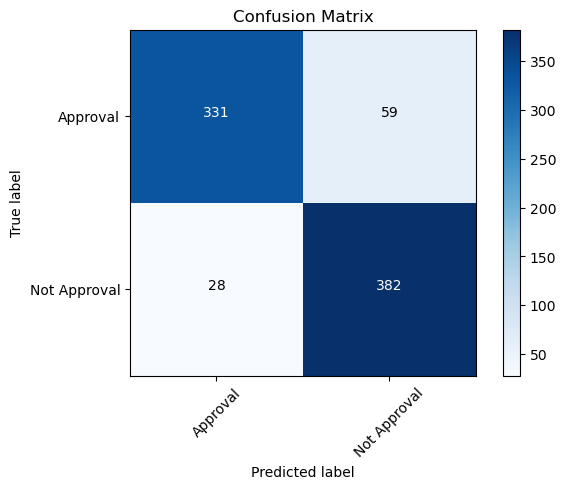

In [31]:
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['Approval', 'Not Approval']
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False, title='Confusion Matrix')
plt.show()

# Using KNN

In [32]:
x_train_norm = preprocessing.StandardScaler().fit(X_train).transform(X_train)
x_train_norm[0:5]

array([[ 0.61319761,  0.14986156,  1.33565716, -1.70787375, -0.13292044,
         8.68807052, -1.0100505 , -0.37820441,  1.80706606,  0.13185706,
         0.19643222, -0.83596887, -0.57195928, -0.47654782, -0.42059823,
         0.53159282],
       [-0.65921659,  1.40415187, -0.26260303, -0.36514706, -0.13292044,
        -0.53567106,  0.9900495 , -0.37820441, -0.61243661,  1.59298955,
        -1.36668889, -0.77400964,  0.50560901, -0.47654782, -0.42059823,
         0.53159282],
       [ 1.12216329, -0.47728359, -1.86086321, -1.70787375, -0.13292044,
        -0.1870662 , -1.0100505 , -0.37820441, -0.61243661,  1.47122851,
         0.19643222, -0.12907039, -0.57195928,  0.35198453,  1.20490217,
        -1.41573269],
       [-0.23507852,  1.40415187, -0.26260303,  2.32030632, -0.13292044,
        -0.23599946, -1.0100505 , -0.37820441,  1.80706606,  1.7147506 ,
         0.82168066,  1.22276736, -0.21276985, -0.47654782, -0.42059823,
         0.53159282],
       [-0.40473375, -0.79085617,  1

In [33]:
k = 3
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train_norm,y_train)
neigh

KNeighborsClassifier(n_neighbors=3)

In [34]:
x_test_norm = preprocessing.StandardScaler().fit(X_test).transform(X_test)
x_test_norm[0:5]

array([[ 0.12072883, -1.12309546, -1.77951751, -1.75993617, -0.12340351,
        -0.58391364,  1.00250313, -0.34023538,  1.78770595, -0.91598704,
         0.8114681 , -0.81895078, -0.54137297, -0.47254393, -0.38043655,
         0.50648674],
       [ 2.68414928,  0.1468358 , -1.77951751, -0.37823947, -0.12340351,
         1.09722669, -0.99750312, -0.34023538, -0.6159323 ,  0.30228334,
         1.41817322, -0.10566468,  0.13428752, -0.47254393, -0.38043655,
         0.50648674],
       [-1.1196359 , -0.17064701,  1.34586999,  1.00345722, -0.12340351,
        -0.57098179, -0.99750312, -0.34023538, -0.6159323 ,  0.42411038,
         1.41817322,  0.87180147, -0.20354272,  0.99236095,  0.5796557 ,
        -2.55539786],
       [ 2.02262142,  0.1468358 , -0.21682376,  1.00345722, -0.12340351,
         0.20826638, -0.99750312, -0.34023538, -0.6159323 ,  1.39872668,
        -0.40194214, -0.47845207, -0.54137297,  0.44426728,  1.53974795,
        -0.51414146],
       [-0.37541706, -0.17064701, -0

In [35]:
y_pred = neigh.predict(x_test_norm)
y_pred[0:5]

array([0, 1, 1, 1, 1])

In [36]:
knn_score=accuracy_score(y_test, y_pred)
kNN_F1_SCORE=f1_score(y_test, y_pred, average='weighted') 
print('F1_score:%.4f'%kNN_F1_SCORE)
print("Test set Accuracy: ", accuracy_score(y_test, y_pred))

F1_score:0.9347
Test set Accuracy:  0.935


In [37]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       344
           1       0.99      0.89      0.94       456

    accuracy                           0.94       800
   macro avg       0.93      0.94      0.93       800
weighted avg       0.94      0.94      0.94       800



Confusion matrix, without normalization
[[341  49]
 [  3 407]]


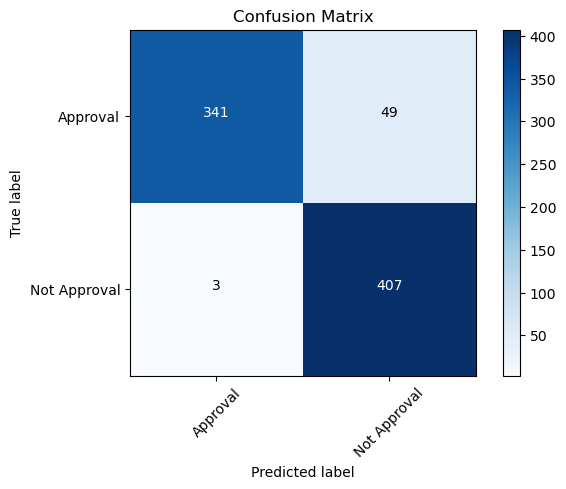

In [38]:
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['Approval', 'Not Approval']
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False, title='Confusion Matrix')
plt.show()

# Using Random Forest

In [39]:
forest = RandomForestClassifier(criterion='entropy',max_depth= None, min_samples_leaf= 1, min_samples_split= 4)
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_split=4)

In [40]:
y_pred = forest.predict(X_test)

In [41]:
rand_score=accuracy_score(y_test, y_pred)
RAnd_F1_SCORE=f1_score(y_test, y_pred, average='weighted') 
print('F1_score:%.4f'%RAnd_F1_SCORE)
print('Accuracy: %f' % accuracy_score(y_test, y_pred))

F1_score:0.9750
Accuracy: 0.975000


In [42]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       376
           1       0.99      0.96      0.98       424

    accuracy                           0.97       800
   macro avg       0.97      0.98      0.97       800
weighted avg       0.98      0.97      0.98       800



Confusion matrix, without normalization
[[373  17]
 [  3 407]]


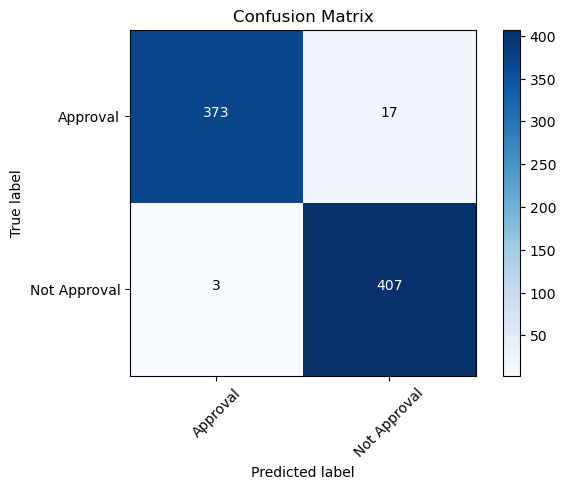

In [43]:
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['Approval', 'Not Approval']
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False, title='Confusion Matrix')
plt.show()

In [44]:
Accuracy=[LR_score*100,knn_score*100,SVM_score*100,round(rand_score*100)]
Algorithm=['logistic regression','SVM','KNN','Random forest']
f1_score=[LR_F1_SCORE*100,kNN_F1_SCORE*100,SVM_F1_SCORE*100,RAnd_F1_SCORE*100]
data={'Algorithm':Algorithm,'Accuracy':Accuracy,'F1_SCORE':f1_score}
Report=pd.DataFrame(data=data)
Report

,Algorithm,Accuracy,F1_SCORE
0,logistic regression,70.250,70.086049
1,SVM,93.500,93.468954
2,KNN,89.125,89.098026
3,Random forest,98.000,97.498137


# RNN Approch - LSTM

In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Reshape data for LSTM (assuming you have a time series dataset)
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model with a specified learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Adjust the learning rate as needed
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test))

# Evaluate the model
_, accuracy = model.evaluate(X_test_lstm, y_test)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

Epoch 1/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6298 - loss: 0.6681 - val_accuracy: 0.6775 - val_loss: 0.6147
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6871 - loss: 0.5910 - val_accuracy: 0.7362 - val_loss: 0.5413
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7588 - loss: 0.5151 - val_accuracy: 0.7600 - val_loss: 0.5064
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7882 - loss: 0.4779 - val_accuracy: 0.7900 - val_loss: 0.4938
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7883 - loss: 0.4762 - val_accuracy: 0.7912 - val_loss: 0.4915
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7931 - loss: 0.4643 - val_accuracy: 0.8012 - val_loss: 0.4919
Epoch 7/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7913 - loss: 0.4711 - val_accuracy: 0.7912 - val_loss: 0.4905
Epoch 8/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7975 - loss: 0.4558 - val_accuracy: 0.